# DATA PREPARATION & FEATURE ENGINEERING

# Scaling

scaling bertujuan untuk menjadikan semua feature dalam skala (range) yg sama

- misal: cocok untuk KNN

In [25]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

Transforming numerical data

- MinMax Scaler
- Standard MinMaxScaler
- Rubust Scaler

In [27]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


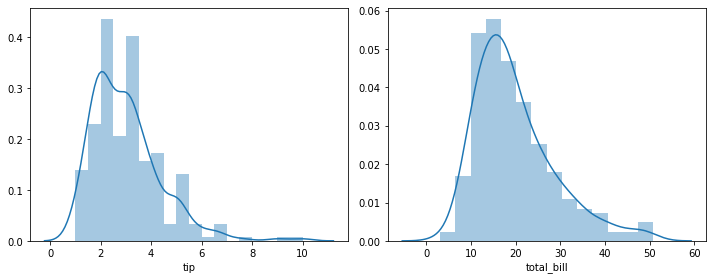

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()

In [31]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [33]:
# import libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [35]:
X = tips[['tip','total_bill']]

In [37]:
# fungsi kita simpan dalam variable
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

# MinMax Scaler

sensitif terhadap outlier, hati-hati!

In [39]:
# mengubah X menjadi X_minmax
X_minmax = minmax.fit_transform(X)

# kita buat menjadi dataframe
X_minmax = pd.DataFrame(X_minmax, columns=['tip','total_bill'])
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [41]:
X_minmax.describe()
# range-nya berubah jadi dari min:0 - max:1

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


In [43]:
X.describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


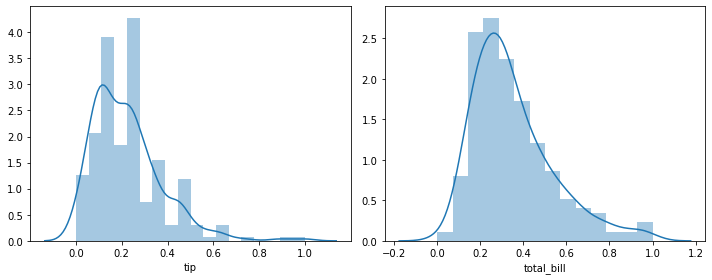

In [45]:
# setelah scaling
# dapat kita lihat, rangnya berubah jadi 0-1

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_minmax['tip'])
plt.subplot(1,2,2)
sns.distplot(X_minmax['total_bill'])
plt.tight_layout()

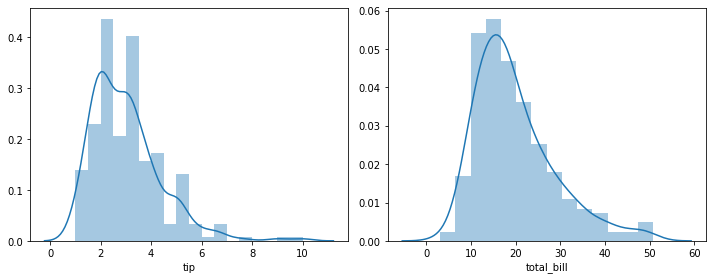

In [47]:
# sebelum scaling
# secara distribusi, berbeda antara sebelum dan sesudah scaling

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.tight_layout()

# Standard Scaler

transforming each variable to mean=0 stdev=1

In [49]:
X_standard = standard.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=['tip','total_bill'])
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


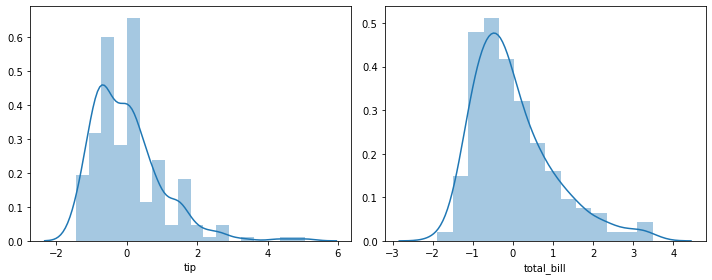

In [51]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_standard['tip'])
plt.subplot(1,2,2)
sns.distplot(X_standard['total_bill'])
plt.tight_layout()

# Robust Scaler

- bagus untuk yg banyak outliers
- mengubah setiap variable menjadi small range
- rumus menggunakan quantile

In [53]:
X_robust = robust.fit_transform(X)
X_robust = pd.DataFrame(X_robust, columns=['tip','total_bill'])
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


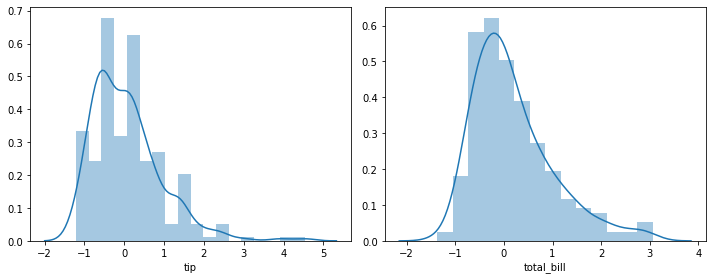

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_robust['tip'])
plt.subplot(1,2,2)
sns.distplot(X_robust['total_bill'])
plt.tight_layout()

In [57]:
X.describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [59]:
X_robust.describe()
# median nya jadi 0

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


No handles with labels found to put in legend.


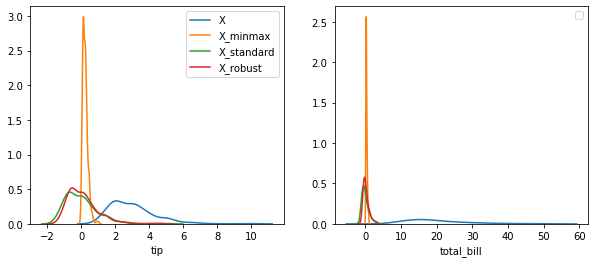

In [61]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.distplot(X['tip'], hist=False, label='X')
sns.distplot(X_minmax['tip'], hist=False, label='X_minmax')
sns.distplot(X_standard['tip'], hist=False, label='X_standard')
sns.distplot(X_robust['tip'], hist=False, label='X_robust')

plt.subplot(1,2,2)
sns.distplot(X['total_bill'], hist=False)
sns.distplot(X_minmax['total_bill'], hist=False)
sns.distplot(X_standard['total_bill'], hist=False)
sns.distplot(X_robust['total_bill'], hist=False)

plt.legend()

# Encoding



- cara untuk merepresentasikan cetegorical variable di machine learning

# Pandas Get Dummies

One Hot Encoding 

In [63]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
for i in ['sex','smoker','day','time']:
    print(tips[i].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


In [67]:
tips_dummy = pd.get_dummies(tips, columns=['sex','smoker','day','time'])
tips_dummy

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


# 1. One Hot Encoding

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [71]:
transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), ['sex','smoker','day','time'])
    # (name, transformer, columns) 
])

In [73]:
tips_encoded = transformer.fit_transform(tips)
tips_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [74]:
# ubah jadi DataFrame

tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded = tips_encoded.astype(int)
tips_encoded

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,0,1,0,0,1,0
240,1,0,0,1,0,1,0,0,1,0
241,0,1,0,1,0,1,0,0,1,0
242,0,1,1,0,0,1,0,0,1,0


In [75]:
transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [76]:
# kolom diberi nama
tips_encoded.columns = transformer.get_feature_names()

# menggabungkan
tips_encoded = pd.concat([tips[['total_bill','tip','size']], tips_encoded], axis=1)

tips_encoded

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


# Ordinal Encoding .map

tetap dalam satu kolom, angka mewakili tingkatannya (di-mapping)

In [77]:
tips_ordinal_encoded = tips.copy()

In [78]:
tips_ordinal_encoded['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [79]:
tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({
    'Thur':1,
    'Fri':2,
    'Sat':3,
    'Sun':4
    })

In [80]:
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2


# Category Encoder

In [122]:
# !pip install category_encoders

In [82]:
import category_encoders as ce

In [83]:
ordinal_mapping = [{
    'col':'day',
    'mapping':{None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}
}]

ordinal_encoder = ce.OrdinalEncoder(cols='day', mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [84]:
# masukkan ke dataframe yang kita punya
tips_ordinal_encoded = pd.concat([tips[['total_bill','tip','sex','smoker','time','size']], dford], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,time,size,day
0,16.99,1.01,Female,No,Dinner,2,4
1,10.34,1.66,Male,No,Dinner,3,4
2,21.01,3.50,Male,No,Dinner,3,4
3,23.68,3.31,Male,No,Dinner,2,4
4,24.59,3.61,Female,No,Dinner,4,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,3
240,27.18,2.00,Female,Yes,Dinner,2,3
241,22.67,2.00,Male,Yes,Dinner,2,3
242,17.82,1.75,Male,No,Dinner,2,3


In [85]:
# Langsung 2 kolom

ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}},
    {'col':'time',
    'mapping':{None:0, 'Lunch':1, 'Dinner':2}}
]

ordinal_encoder = ce.OrdinalEncoder(cols=['day','time'], mapping=ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips[['day','time']])
dford

,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,3,2
240,3,2
241,3,2
242,3,2


In [86]:
# masukkan ke dataframe yang kita punya
tips_ordinal_encoded = pd.concat([tips[['total_bill','tip','sex','smoker','size']], dford], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,size,day,time
0,16.99,1.01,Female,No,2,4,2
1,10.34,1.66,Male,No,3,4,2
2,21.01,3.50,Male,No,3,4,2
3,23.68,3.31,Male,No,2,4,2
4,24.59,3.61,Female,No,4,4,2
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,3,2
240,27.18,2.00,Female,Yes,2,3,2
241,22.67,2.00,Male,Yes,2,3,2
242,17.82,1.75,Male,No,2,3,2


# 2. Binary Encoding

cocok untuk data nominal

category --> angka --> binary

sun --> 1 --> 001

baca binary: 1011 -> 2**3 + 0*(2**2) + 2**1 + 2**0


In [87]:
binary_encoder = ce.BinaryEncoder(cols=['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin 

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


# Apply Several Preprocessing Method to Modeling at once Part

## 1a: Ridge

In [88]:
from sklearn.model_selection import train_test_split # data splitting
from sklearn.linear_model import Ridge # ML model
from sklearn.metrics import mean_squared_error # evaluation


In [124]:
tips= sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Preprocessing

preprocess scheme:  
* one hot encoding : sex, smoker, time  
* binary encoding : day  
* robust scaler : total_bill  
* no treatment : size


In [125]:
transformer = ColumnTransformer([
                                 # (name, transformer, columns) 
                                 ('encoder', OneHotEncoder(drop='first'), ['sex','smoker','time']),
                                 ('binary encoder', ce.BinaryEncoder(), ['day']),
                                 ('robust scaler', RobustScaler(), ['total_bill'])
                                ], remainder='passthrough') # sisanya, gaperlu diapa-apain

## Data Splitting

In [144]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [127]:
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state = 10
)

# default test size 30%
# tidak perlu stratify, karena linear regression

## Data Transform

di sini kita akan melakukan tahap Preprocessing. tahapannya:
- .fit hanya untuk data train
- .transform untuk data train dan data test

In [129]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [130]:
# fitting AND transforming X_train
X_train_preprocessed = transformer.fit_transform(X_train) 

# transforming X_test
X_test_preprocessed = transformer.transform(X_test)

# 'transformer' sudah belajar (sudah difit) di X_train, jadi saat di X_test cuma dites aja
# cukup fitting X_train aja, agar fittingnya (misal scalingnya) menyusaikan yg X_train aja. Kalau X_test difit juga, nanti scale X_train dan X_test nya beda, padahal harusnya sama


misal

- dataset : 0,1,2,3,4,5,6,7,8,9,10

- X_train : 0,1,3,6,7,9,10 (ini scalingnya dibagi 10 (10-0))
        
        - 3 akan menjadi 0.3 (3/10)
        
- X_test : 2,4,8 (ini scalingnya dibagi 6 (8-2))

        - 2 akan menjadi 0.33 (2/6), padahal harusnya 0.2 agar scalenya sama dgn train

In [131]:
# ini bentuknya masih array
X_train_preprocessed

array([[ 1.        ,  1.        ,  0.        , ...,  1.        ,
        -0.56639566,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.64769648,  3.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.31616983,  3.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.38211382,  2.        ],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         1.11020777,  6.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.24661247,  2.        ]])

## Rename columns DataFrame kita mengunakan sklearn


In [132]:
#  ubah array menjadi dataframe
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

X_train_preprocessed # sudah berubah jadi dataframe

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


In [133]:
# menampilkan nama-nama transformer dalam variable transformer (dgn menggunakan fungsi transformers_)
transformer.transformers_

[('encoder',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['sex', 'smoker', 'time']),
 ('binary encoder',
  BinaryEncoder(cols=None, drop_invariant=False, handle_missing='value',
                handle_unknown='value', mapping=None, return_df=True, verbose=0),
  ['day']),
 ('robust scaler',
  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
               with_scaling=True),
  ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [134]:
transformer.transformers_[0][1]

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [135]:
# Mengubah nama columns yg menggunakan OneHot Encoder
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [136]:
# Mengubah nama columns yg menggunakan Binary Encoder
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [137]:
# Memasukkan nama columns
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill scaled','size']

features

['x0_Male',
 'x1_Yes',
 'x2_Lunch',
 'day_0',
 'day_1',
 'day_2',
 'total_bill scaled',
 'size']

In [138]:
# mengubah nama columns pada X_train dan X_test sesuai dengan variable 'features'
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

In [139]:
X_train_preprocessed # DataFrame sudah berubah nama column nya, sudah siap di-fitting

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


# Model Fitting and Evaluation

kita fitting model menggunakan training set dan mengevaluasi modelnya menggunakan test set

In [140]:
# fitting data menggunakan train set
model = Ridge()
model.fit(X_train_preprocessed, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [141]:
# prediksi (kita tes datanya)
y_pred = model.predict(X_test_preprocessed)
print('mse:', mean_squared_error(y_test, y_pred))

mse: 1.0577456219830776


# Model Properties

di sini, kita menampilkan Model Properties. Kita tampilkan linear regression's coefficient untuk tujuan interpretasi

In [142]:
coeff_table = pd.DataFrame({
    'features' : features,
    'coeff' : model.coef_
})

coeff_table

,features,coeff
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill scaled,1.086144
7,size,0.172890


## Interpretasi dari Coef

Jika yg bayar tip laki-laki (male), maka tipnya akan lebih rendah 0.21 dollar daripada perempuan

preprocess v1 scheme:  
* one hot encoding : sex, smoker, time
* ordinal encoding : day
* no treatment : size, total_bill


# Apply Several Preprocessing Method to Modeling at once Part

## 1b: 

In [143]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
model